<a href="https://colab.research.google.com/github/ombhope/ma22c030_2023_pl/blob/main/Assignment%2013/MA22C030PLA14(Atmospheric_carbon_dioxide).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import urllib.request
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import shutil

data_source_url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
output_data_file = '../../data_external/CO2_levels_alternate'

In [5]:
# Create the data_external directory if it doesn't exist
if not os.path.isdir('../../data_external/'):
    os.mkdir('../../data_external/')

# Download data from the source URL and save it to the local file
response = urllib.request.urlopen(data_source_url)
with open(output_data_file, 'wb') as output_file:
    shutil.copyfileobj(response, output_file)

# Load data into a NumPy array, skipping the header
raw_data = np.genfromtxt(output_data_file, skip_header=72, names=("year", "month", "date", "average"))
raw_data['average'] = np.ma.masked_invalid(raw_data['average'])

# Create a DataFrame from the masked data
co2_data_frame = pd.DataFrame(raw_data, columns=['year', 'month', 'date', 'average'])

# Display the DataFrame
print(co2_data_frame)

def quadratic_fit_function(x, a, b, c):
    return a * x**2 + b * x + c

       year  month       date  average
0    1960.0    9.0  1960.7077   314.17
1    1960.0   10.0  1960.7896   313.83
2    1960.0   11.0  1960.8743   315.00
3    1960.0   12.0  1960.9563   316.19
4    1961.0    1.0  1961.0411   316.89
..      ...    ...        ...      ...
754  2023.0    7.0  2023.5417   421.83
755  2023.0    8.0  2023.6250   419.68
756  2023.0    9.0  2023.7083   418.51
757  2023.0   10.0  2023.7917   418.82
758  2023.0   11.0  2023.8750   420.46

[759 rows x 4 columns]


In [6]:
# Perform the quadratic curve fit
time_index = np.arange(len(co2_data_frame))
co2_levels = co2_data_frame['average']
fit_params, _ = curve_fit(quadratic_fit_function, time_index, co2_levels)

In [7]:
# Extract the coefficients of the quadratic fit
a, b, c = fit_params

In [8]:
# Calculate the rate of change
rate_of_change = 2 * a * time_index[-1] + b

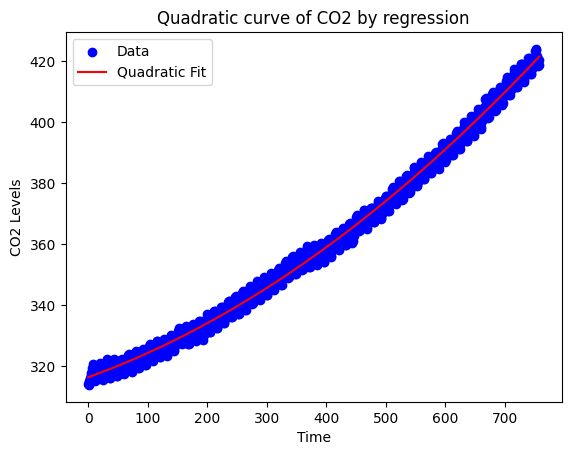

In [9]:
# Plot the data and the quadratic fit
plt.figure()
plt.scatter(time_index, co2_levels, label='Data', color='b')
plt.plot(time_index, quadratic_fit_function(time_index, a, b, c), 'r', label='Quadratic Fit')
plt.title("Quadratic curve of CO2 by regression")
plt.xlabel("Time")
plt.ylabel("CO2 Levels")
plt.legend()
plt.show()

In [10]:
# Display the rate of change
print(rate_of_change)

0.20672254207143517


In [11]:
# Check if the rate of change is positive
if rate_of_change > 0:
    print("YES! The rate of increase of CO2 is increasing.")
else:
    print("The rate of increase of CO2 is not increasing.")

YES! The rate of increase of CO2 is increasing.
